In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [5]:
data=pd.read_csv("data/stud.csv")
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#we will try to predict math score
x=data.drop("math_score",axis=1)

In [8]:
y=data["math_score"]
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
#create column transformer with 3 types of transformer
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

numeric_transformer=StandardScaler()   #for standardizing numerical column 
oh_transformer=OneHotEncoder()         #for categorical column

preprocessor=ColumnTransformer(         #responsible for transforming columns
    [                                    #we have creayed pipeline so it will happen sequence wise
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)


In [17]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [ ]:
#doing transformation of x xolumn
x=preprocessor.fit_transform(x)

In [21]:
x.shape

(1000, 19)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#training and testing split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [33]:
#creating an evaluation function to give all metrics after model training
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square


In [39]:
#models
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)


    #make prediction
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    #evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2=evaluate_model(y_train,y_train_pred)

    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training set")
    print("RMSE : {:.4f}".format(model_train_rmse))
    print("MAE: {:.4f}".format(model_train_mae))
    print("R2 Square : {:.4f}".format(model_train_r2))

    print("..................................")
    print("Model Performance for Test set")
    print("RMSE : {:.4f}".format(model_test_rmse))
    print("MAE: {:.4f}".format(model_test_mae))
    print("R2 Square : {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")




Linear Regression
Model Performance for Training set
RMSE : 5.3274
MAE: 4.2788
R2 Square : 0.8741
..................................
Model Performance for Test set
RMSE : 5.4096
MAE: 4.2259
R2 Square : 0.8797


Lasso
Model Performance for Training set
RMSE : 6.5938
MAE: 5.2063
R2 Square : 0.8071
..................................
Model Performance for Test set
RMSE : 6.5197
MAE: 5.1579
R2 Square : 0.8253


Ridge
Model Performance for Training set
RMSE : 5.3233
MAE: 4.2650
R2 Square : 0.8743
..................................
Model Performance for Test set
RMSE : 5.3904
MAE: 4.2111
R2 Square : 0.8806


K-Neighbors Regressor
Model Performance for Training set
RMSE : 5.7122
MAE: 4.5187
R2 Square : 0.8553
..................................
Model Performance for Test set
RMSE : 7.2516
MAE: 5.6160
R2 Square : 0.7839


Decision Tree
Model Performance for Training set
RMSE : 0.2795
MAE: 0.0187
R2 Square : 0.9997
..................................
Model Performance for Test set
RMSE : 7.8864
MA

In [40]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2 Score"]).sort_values(by=["R2 Score"],ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.879740
7,CatBoosting Regressor,0.851632
5,Random Forest,0.851033
8,AdaBoost Regressor,0.849249
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.744409


In [41]:
#we will go with linear regression
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)
print("Accuracy of the model is : ",score)

Accuracy of the model is :  0.8797402769404664


Text(0, 0.5, 'predicted')

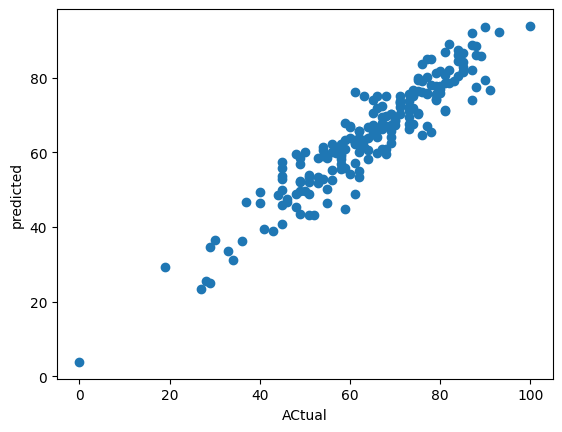

In [42]:
#plot y_test and y_pred
plt.scatter(y_test,y_pred)
plt.xlabel("ACtual")
plt.ylabel("predicted")

Text(0, 0.5, 'predicted')

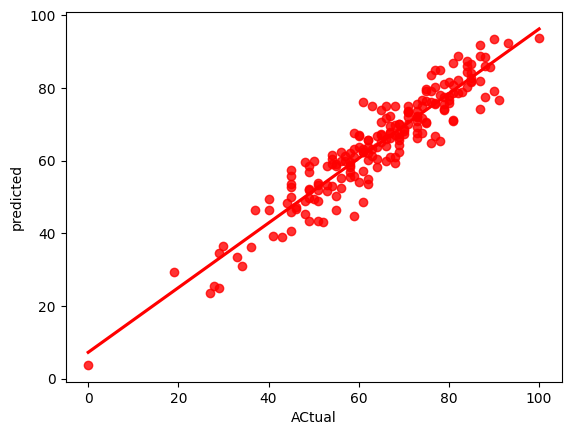

In [45]:
#regression plot for actual vs predicted
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,color="red",ci=None)
plt.xlabel("ACtual")
plt.ylabel("predicted")